##### 생선의 무개와 크기로 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 ==> 분류 
- 학습 알고리즘(문제해결방법) : 최근접이웃알고리즘 개선

[1]데이터 준비

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
DATA_FILE='../data/fish.csv'
## - usecols로  사용할 만큼 불러오기 : Species, Weight, Length OR  0, 1, 2
fishDF=pd.read_csv(DATA_FILE,usecols=(0,1,2))
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [6]:
mask=(fishDF['Species']=='Bream')|(fishDF['Species']=='Smelt')
twoDF=fishDF[mask]
twoDF.reset_index(drop=True,inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [7]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_7704\3608636985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['S_code']=twoDF['Species'].replace({'Bream':0,'Smelt':1})


In [8]:
twoDF.head()

,Species,Weight,Length,S_code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0


[2] 피쳐와 타겟 분리

In [9]:
features=twoDF[['Weight','Length']]
target=twoDF['S_code']

print(f'features.shape : {features.shape}, {features.ndim}D')
print(f'target.shape : {target.shape},{target.ndim}D')

features.shape : (49, 2), 2D
target.shape : (49,),1D


[3] 데이터셋준비 => 학습용,테스트용

In [10]:
from sklearn.model_selection import train_test_split

#train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,stratify=target,random_state=10)

In [11]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D')
print(f'Y_train : {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'Y_test : {Y_test.shape}, {Y_test.ndim}D')

X_train : (39, 2), 2D
Y_train : (39,), 1D
X_test : (10, 2), 2D
Y_test : (10,), 1D


In [12]:
# target 0,1의 비율
print(Y_train.value_counts()[0]/Y_train.shape[0],Y_train.value_counts()[1]/Y_train.shape[0])
print(Y_test.value_counts()[0]/Y_test.shape[0],Y_test.value_counts()[1]/Y_test.shape[0])

0.717948717948718 0.28205128205128205
0.7 0.3


[3-2] 피쳐 스케일링

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
#스케일러 인스턴스 생성
nmScaler=MinMaxScaler()
nmScaler.fit(X_train)

MinMaxScaler()

In [15]:
nmScaler.min_,nmScaler.data_min_,nmScaler.scale_,nmScaler.data_max_

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [16]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray타입 반환
X_train_scaled=nmScaler.transform(X_train)
X_train_scaled.shape

(39, 2)

In [17]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray타입 반환
X_test_scaled=nmScaler.transform(X_test)
X_test_scaled.shape
X_test_scaled.min()

0.0033222591362126247

[4] 훈련/학습 진행 
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [18]:
from sklearn.neighbors import KNeighborsClassifier
# 학습인스턴스 생성
model=KNeighborsClassifier()

In [19]:
model.fit(X_train_scaled,Y_train)

KNeighborsClassifier()

In [20]:
model.classes_,model.n_samples_fit_
# model.feature_names_in_   <==ndarray일 경우 컬럼명 X

(array([0, 1], dtype=int64), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [21]:
model.score(X_test_scaled,Y_test)

1.0

[6] 최적의 K개수 찾기 ==> 모델의 성능 영향 미치는 파라미터
- 하이퍼 파라미터

In [22]:
# K의 범위 : 1~ 전체 데이터 개수

scores,point=[],[]
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors=k

    # 점수계산
    grade=model.score(X_test_scaled, Y_test)

    if k>1:
        if grade != scores[-1]:point.append(k)
    scores.append(grade)
point

[22]

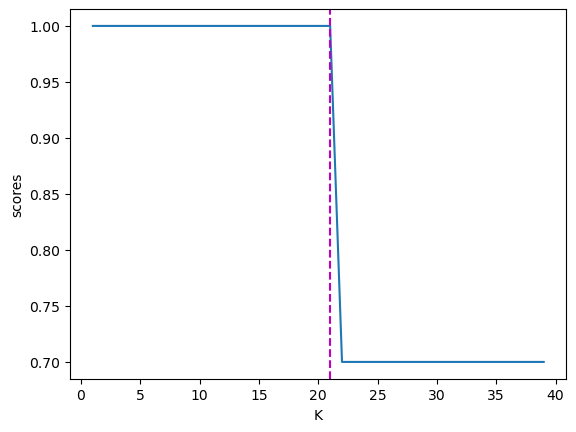

In [23]:
#x축 점수 k, y 축 점수
plt.plot(range(1,40),scores)
plt.xlabel('K')
plt.ylabel('scores')
plt.axvline(point[0]-1,0.0,1.0,color='m',linestyle='dashed')
plt.show()

[7] 예측 하기 ===> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의 : 입력 데이터 ==> 2D

In [24]:
new_data=pd.DataFrame([[413,27.8]],columns=['Weight','Length'])
new_data

,Weight,Length
0,413,27.8


In [25]:
new_data_scaled=nmScaler.transform(new_data)

In [26]:
model.predict(new_data_scaled)

array([0], dtype=int64)

In [27]:
### 최근접한 kro 데이터 찾기
distance,index=model.kneighbors(new_data_scaled)
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703,
        0.08448221, 0.10667685, 0.12006426, 0.13283514, 0.13487345,
        0.14742788, 0.15337025, 0.23143819, 0.25707598, 0.26964939,
        0.29923871, 0.3005092 , 0.33355916, 0.33834045, 0.35427164,
        0.36978152, 0.38571904, 0.57002596, 0.61493269, 0.62276118,
        0.63676715, 0.63743027, 0.64447977, 0.64901627, 0.65396783,
        0.66044108, 0.66734496, 0.66921546, 0.67438368, 0.68627917,
        0.68648846, 0.68855791, 0.70647952, 0.70721597]])

In [28]:
idx=index.reshape(-1).tolist()

In [29]:
X_train_scaled[idx]

array([[4.26155240e-01, 6.15384615e-01],
       [3.58703312e-01, 6.15384615e-01],
       [4.46290144e-01, 6.37820513e-01],
       [3.85885432e-01, 6.47435897e-01],
       [4.46290144e-01, 6.47435897e-01],
       [3.35548173e-01, 5.35256410e-01],
       [4.96627404e-01, 6.37820513e-01],
       [4.71458774e-01, 6.79487179e-01],
       [2.85210913e-01, 5.28846154e-01],
       [4.96627404e-01, 6.79487179e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.35548173e-01, 7.11538462e-01],
       [5.97301923e-01, 7.11538462e-01],
       [5.72133293e-01, 7.75641026e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.17436827e-01, 7.91666667e-01],
       [6.47639183e-01, 7.59615385e-01],
       [6.97976442e-01, 7.43589744e-01],
       [6.82875264e-01, 7.75641026e-01],
       [6.77841538e-01, 8.07692308e-01],
       [6.97976442e-01, 8.07692308e-01],
       [7.18111346e-01, 8.07692308e-01],
       [1.32890365e-02, 1.66666667e-01],
       [9.19460385e-01, 9.19871795e-01],
       [5.537098

In [30]:
k_weight=X_train_scaled[idx][:,0]
k_length=X_train_scaled[idx][:,1]
print(k_weight,k_length,sep='\n')

[4.26155240e-01 3.58703312e-01 4.46290144e-01 3.85885432e-01
 4.46290144e-01 3.35548173e-01 4.96627404e-01 4.71458774e-01
 2.85210913e-01 4.96627404e-01 4.96627404e-01 3.35548173e-01
 5.97301923e-01 5.72133293e-01 6.07369375e-01 6.17436827e-01
 6.47639183e-01 6.97976442e-01 6.82875264e-01 6.77841538e-01
 6.97976442e-01 7.18111346e-01 1.32890365e-02 9.19460385e-01
 5.53709856e-03 6.74519279e-03 9.24494111e-01 9.54696466e-01
 3.12091010e-03 3.22158462e-03 1.00000000e+00 2.01349039e-03
 3.12091010e-03 3.02023558e-03 3.02023558e-04 9.49662740e-01
 8.05396154e-04 9.74831370e-01 0.00000000e+00]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359  0.53525641
 0.63782051 0.67948718 0.52884615 0.67948718 0.69551282 0.71153846
 0.71153846 0.77564103 0.75961538 0.79166667 0.75961538 0.74358974
 0.77564103 0.80769231 0.80769231 0.80769231 0.16666667 0.91987179
 0.1025641  0.08333333 0.95192308 0.91987179 0.07051282 0.06410256
 0.87179487 0.04807692 0.04487179 0.03846154 0.02564103 1.
 0.0224359

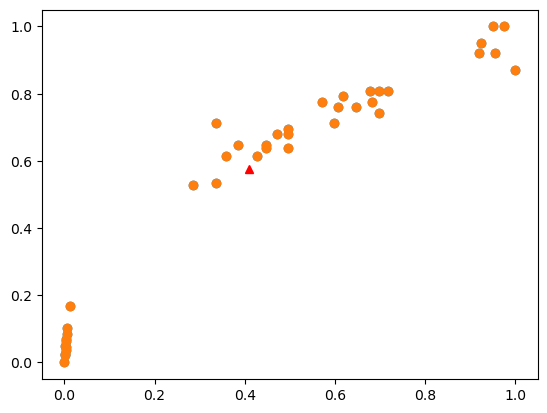

In [31]:
### 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개의 피쳐(Weight,Lenght)로 종 분류 가능
#plt.scatter(twoDF.loc[:34,'Weight'],twoDF.loc[:34,'Length'])
#plt.scatter(twoDF.loc[35:,'Weight'],twoDF.loc[35:,'Length'])
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0],new_data_scaled[0,1],'r^')
plt.scatter(k_weight,k_length)
plt.show()